## Estimating the temperature of CMB

In [2]:
from astropy.io import ascii
cmb=ascii.read('/home/ambica/Downloads/COBE_CMB_data.txt')
cmb['brightness (J/s/m^2/sr/Hz)']=1e-3*cmb['brightness (ergs/s/cm^2/sr/Hz)']
cmb

frequency (Hz),brightness (ergs/s/cm^2/sr/Hz),brightness (J/s/m^2/sr/Hz)
float64,float64,float64
34473577711.372055,7.029471536390586e-16,7.029471536390586e-19
42896956937.69582,1.0253178228238486e-15,1.0253178228238486e-18
51322332225.44733,1.3544045476166584e-15,1.3544045476166584e-18
60344529880.18272,1.6902073280174815e-15,1.6902073280174815e-18
68767909106.5062,2.0125779972022745e-15,2.0125779972022743e-18
77780126454.10146,2.3148004995630144e-15,2.3148004995630145e-18
...,...,...
489996752265.52826,3.201319839821188e-16,3.201319839821188e-19
506039097962.6759,2.5968748350997043e-16,2.596874835099704e-19


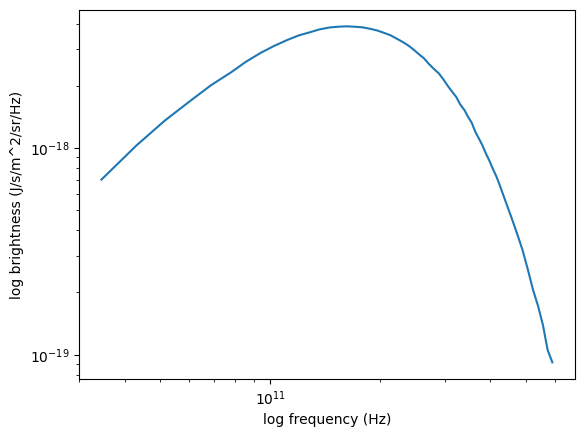

In [3]:
import matplotlib.pyplot as plt
plt.loglog(cmb['frequency (Hz)'],cmb['brightness (J/s/m^2/sr/Hz)'])
plt.xlabel('log frequency (Hz)')
plt.ylabel('log brightness (J/s/m^2/sr/Hz)')
plt.show()

In [4]:
import numpy as np
from scipy.optimize import curve_fit
from scipy.constants import h,c,k

def planck(v,x):
    return 2*h/c/c * v**3 /np.expm1(h*v/k/x)

popt,pcov= curve_fit(planck, cmb['frequency (Hz)'],cmb['brightness (J/s/m^2/sr/Hz)'])
print(popt, pcov)

[2.73805094] [[7.71552949e-07]]


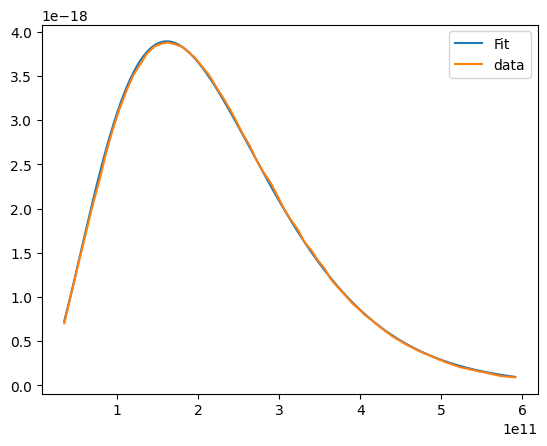

In [5]:
fig, ax= plt.subplots()
v=np.linspace(cmb['frequency (Hz)'].min(),cmb['frequency (Hz)'].max(),500)
ax.plot(v, planck(v,popt), label='Fit')
ax.plot(cmb['frequency (Hz)'],cmb['brightness (J/s/m^2/sr/Hz)'], label='data')
ax.legend()
plt.show()

### T=2.74 K

## Galactic Rotation Curve from 21 cm Line Doppler Shift

In [14]:
import scipy.stats as stats

files=[0.69,1.38,2.06,2.72,3.35,3.96,4.54,5.11,5.62,6.06,6.5,6.87]
actual =21
vels=[]

def doppler(wavelength):
    rs=((abs(wavelength-actual))/actual)
    k=(1+rs)**2
    return c*(k-1)/(k+1)

def gaussian(x,disp, amp, mu,sigma):
    return disp+amp*stats.norm.pdf(x,mu,sigma)

for fl in files:
    data=ascii.read('/home/ambica/Downloads/galaxy_21cm_spectrum/spectrum_d_'+str(fl)+'_kpc.txt')
    popts, pcovs=curve_fit(gaussian, data["wavelngth (cm)"],data['brightness'],p0=(0,3000,21,1))
    vels.append(doppler(popts[2]))

Text(0, 0.5, 'Doppler Velocity')

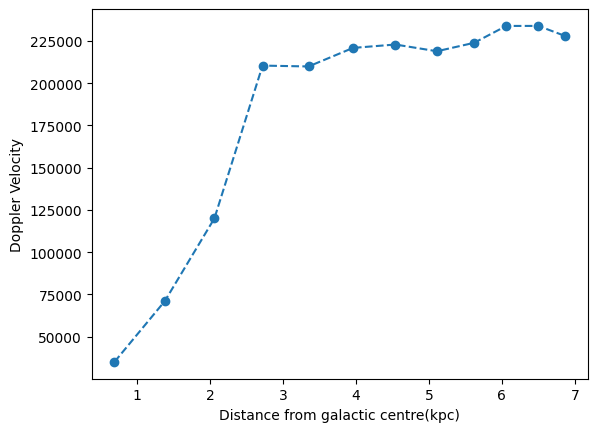

In [16]:
plt.plot(files, vels,ls='--')
plt.scatter(files, vels)
plt.xlabel('Distance from galactic centre(kpc)')
plt.ylabel('Doppler Velocity')